#Setting up JVM

In [1]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 

#Installing Apache Spark 3.0.1 with Hadoop 2.7

In [2]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-18 18:52:51--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  26.3MB/s    in 10s     

2023-05-18 18:53:02 (25.5 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



#Unzipping the folder

In [3]:
!tar xf spark-3.2.1-bin-hadoop2.7.tgz

#Install findspark library

In [4]:
!pip install -q findspark

#Setting up the environment path and importing findspark

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

#Import and create Spark Session

In [6]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Big_Data_Assessment")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

#printing spark variable

spark

#Loading the data set

In [9]:
buy_clicks_df = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)
ad_clicks_df = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)
game_clicks_df = spark.read.csv("/content/game-clicks.csv", header=True, inferSchema=True)
level_events_df = spark.read.csv("/content/level-events.csv", header=True, inferSchema=True)
team_assignments_df = spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)
team_df = spark.read.csv("/content/team.csv", header=True, inferSchema=True)
user_session_df = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)
users_df = spark.read.csv("/content/users.csv", header=True, inferSchema=True)
combined_data_df = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)

#Taking a look at the data set

In [10]:
buy_clicks_df.show(5)
buy_clicks_df.printSchema()

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 5 rows

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



#Printing Summary statistics

Also, indicates that no missing values in buy-clicks data set

In [ ]:

buy_clicks_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,2947,None,None,2016-05-26 15:36:54,2016-06-16 10:36:54
txId,2947,25443.01085850017,9343.543792592367,6004,39842
userSessionId,2947,22884.75229046488,8669.35362676463,5652,39275
team,2947,70.31896844248388,40.27452540199273,2,178
userId,2947,1187.4591109602986,685.7038088341923,1,2387
buyId,2947,2.530709195792331,1.7799870722907862,0,5
price,2947,7.263997285374957,7.076313004712134,1.0,20.0


In [ ]:

buy_clicks_df.count()


2947

#EDA

In [ ]:
#Check for missing values in all datasets

# Get row count
rows_ad = ad_clicks_df.count()
rows_combined = combined_data_df.count()
rows_game = game_clicks_df.count()
rows_level = level_events_df.count()
rows_team_assignment = team_assignments_df.count()
rows_team = team_df.count()
rows_session = user_session_df.count()
rows_users = users_df.count()

print(f"Ad-clicks DataFrame Rows count         : {rows_ad}")
print(f"combined DataFrame Rows count          : {rows_combined}")
print(f"game-clicks DataFrame Rows count       : {rows_game}")
print(f"level_events DataFrame Rows count      : {rows_level}")
print(f"team-assignments DataFrame Rows count  : {rows_team_assignment}")
print(f"team DataFrame Rows count              : {rows_team}")
print(f"user-session DataFrame Rows count      : {rows_session}")
print(f"users DataFrame Rows count             : {rows_users}")



Ad-clicks DataFrame Rows count         : 16323
combined DataFrame Rows count          : 4619
game-clicks DataFrame Rows count       : 755806
level_events DataFrame Rows count      : 1254
team-assignments DataFrame Rows count  : 9826
team DataFrame Rows count              : 109
user-session DataFrame Rows count      : 9250
users DataFrame Rows count             : 2393


In [ ]:
ad_clicks_df.describe().toPandas().transpose()

#No missing values

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,16323,None,None,2016-05-26 15:13:22,2016-06-16 11:05:29
txId,16323,24613.82925932733,9513.244787359043,5972,39833
userSessionId,16323,22090.77344850824,8780.27306545314,5649,39623
teamId,16323,70.29492127672609,39.63199500554996,2,179
userId,16323,1187.4641916314404,691.5619445575,1,2387
adId,16323,14.654046437542119,8.623599159144106,0,29
adCategory,16323,None,None,automotive,sports


In [ ]:
combined_data_df.describe().toPandas().transpose()

#No missing values 

,0,1,2,3,4
summary,count,mean,stddev,min,max
userId,4619,1189.9647109764019,691.0986309664246,0,2389
userSessionId,4619,17963.06798008227,7947.681126803095,5648,38722
teamLevel,4619,4.355704697986577,1.9246625516949587,1,8
platformType,4619,None,None,android,windows
count_gameclicks,4619,143.06300064949124,126.88339694316925,1,1207
count_hits,4619,15.705780471963628,13.986901900918744,0,121
count_buyId,4619,1.6832034018426647,0.9005088871085436,1,NULL
avg_price,4619,7.214323175053155,6.536501375588665,1.00,NULL


In [ ]:
game_clicks_df.describe().toPandas().transpose()

#No missing values 

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,755806,None,None,2016-05-26 15:06:55,2016-06-16 11:06:51
clickId,755806,377902.5,218182.54311509102,0,755805
userId,755806,1230.0917761965372,689.1974297436151,0,2389
userSessionId,755806,21444.64732484262,8807.252224659778,5648,39790
isHit,755806,0.1103232840173272,0.31329249414120713,0,1
teamId,755806,91.55913289918313,43.862726470866114,2,181
teamLevel,755806,4.561732772695639,2.0500182843454655,1,8


In [ ]:
level_events_df.describe().toPandas().transpose()

#No missing values 

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,1254,None,None,2016-05-27 23:06:54,2016-06-16 11:06:54
eventId,1254,626.5,362.14292758522845,0,1253
teamId,1254,94.33971291866028,44.37661933285508,2,179
teamLevel,1254,4.085326953748006,1.9584409193937282,1,8
eventType,1254,None,None,end,start


In [ ]:
team_assignments_df.describe().toPandas().transpose()

#No missing values 

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,9826,None,None,2016-05-26 14:06:54,2016-06-16 11:06:54
team,9826,87.46468552819051,43.42936266588799,2,184
userId,9826,1209.5669651943822,689.1245775643522,0,2392
assignmentId,9826,18491.93018522288,9883.61709631016,5000,39860


In [ ]:
team_df.describe().toPandas().transpose()

#No missing values 

,0,1,2,3,4
summary,count,mean,stddev,min,max
teamId,109,56.88990825688074,38.115161620566106,0,171
name,109,None,None,0C9CGHMm8,zxD2k3Md
teamCreationTime,109,None,None,2016-06-02 03:36:54,2016-06-16 10:00:06
teamEndTime,109,None,None,2016-06-02 07:06:54,9999-12-31 23:59:59
strength,109,0.4835207572530579,0.2788252003005053,0.00401521168869,0.994851162257
currentLevel,109,1.0,0.0,1,1


In [ ]:
user_session_df.describe().toPandas().transpose()

#No missing values 

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,9250,None,None,2016-05-26 14:36:55,2016-06-16 11:06:54
userSessionId,9250,17973.522594594593,7953.932718534248,5648,38722
userId,9250,1189.6912432432432,691.0445045861406,0,2389
teamId,9250,72.3907027027027,41.458779047213525,2,179
assignmentId,9250,10288.336,6960.614801008102,5002,37948
sessionType,9250,None,None,end,start
teamLevel,9250,4.357405405405405,1.9248621663280168,1,8
platformType,9250,None,None,android,windows


In [ ]:
users_df.describe().toPandas().transpose()

#No missing values 

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,2393,None,None,2012-06-19 14:53:41,2016-06-16 05:39:34
userId,2393,1196.0,690.9439195766904,0,2392
nick,2393,None,None,01hRCMOSWz,zundHJEB
twitter,2393,None,None,@00s8sd4,@zxVDB
dob,2393,None,None,1946-07-23,1998-06-13
country,2393,None,None,AD,ZW


#Duplicate check

Found that there are no duplicate values

In [ ]:
distinctDF_buy = buy_clicks_df.distinct()
distinctDF_ad = ad_clicks_df.distinct()
distinctDF_combined = combined_data_df.distinct()
distinctDF_game= game_clicks_df.distinct()
distinctDF_level = level_events_df.distinct()
distinctDF_assign = team_assignments_df.distinct()
distinctDF_team = team_df.distinct()
distinctDF_session = user_session_df.distinct()
distinctDF_users = users_df.distinct()

print("Distinct count of buy_clicks DF   : "+str(distinctDF_buy.count()))
print("Distinct count of ad-clicks DF    : "+str(distinctDF_ad.count()))
print("Distinct count combined_data DF   : "+str(distinctDF_combined.count()))
print("Distinct count of game-clicks DF  : "+str(distinctDF_game.count()))
print("Distinct count of level-events DF : "+str(distinctDF_level.count()))
print("Distinct count team assignments DF: "+str(distinctDF_assign.count()))
print("Distinct count of team DF         : "+str(distinctDF_team.count()))
print("Distinct count of user-session DF : "+str(distinctDF_session.count()))
print("Distinct count of users DF        : "+str(distinctDF_users.count()))

Distinct count of buy_clicks DF   : 2947
Distinct count of ad-clicks DF    : 16323
Distinct count combined_data DF   : 4619
Distinct count of game-clicks DF  : 755806
Distinct count of level-events DF : 1254
Distinct count team assignments DF: 9826
Distinct count of team DF         : 109
Distinct count of user-session DF : 9250
Distinct count of users DF        : 2393


In [ ]:
#Converting DOB to Age
from pyspark.sql import functions as f

users_age_df = users_df.withColumn("age", 
  (f.months_between(f.current_date(), f.col('dob')) / 12).cast('int'))

users_age_df.show(5)

+-------------------+------+-----------+--------+----------+-------+---+
|          timestamp|userId|       nick| twitter|       dob|country|age|
+-------------------+------+-----------+--------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA| 28|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU| 52|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS| 53|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM| 57|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC| 28|
+-------------------+------+-----------+--------+----------+-------+---+
only showing top 5 rows



In [ ]:
#Creating Age Bins

from pyspark.sql.functions import udf


age_range = udf(lambda age: '< 20' if age < 20 else 
                       '20-29' if (age >= 20 and age < 30) else
                       '30-39' if (age >= 30 and age < 40) else
                       '40-49' if (age >= 40 and age < 50) else        
                       '50-59' if (age >= 50 and age < 60) else
                       '60-70' if (age >= 60 and age < 70) else
                       '70-79' if (age >= 70 and age < 79) else
                       '80-100' if (age >= 80 and age < 101)  else ""    
                       )

users_age_df = users_age_df.withColumn('age_group', age_range(users_age_df.age))
users_age_df.show(5)

+-------------------+------+-----------+--------+----------+-------+---+---------+
|          timestamp|userId|       nick| twitter|       dob|country|age|age_group|
+-------------------+------+-----------+--------+----------+-------+---+---------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA| 28|    20-29|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU| 52|    50-59|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS| 53|    50-59|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM| 57|    50-59|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC| 28|    20-29|
+-------------------+------+-----------+--------+----------+-------+---+---------+
only showing top 5 rows



In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col
import pyspark.sql.functions as f


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

w = Window.partitionBy('x')

users_age_df_grouped = users_age_df.groupBy('age_group').count()\
        .select('age_group', f.col('count').alias('age_group_count'))\
        .sort(f.asc("age_group")) 


users_age_df_grouped.show()

+---------+---------------+
|age_group|age_group_count|
+---------+---------------+
|    20-29|            310|
|    30-39|            602|
|    40-49|            552|
|    50-59|            431|
|    60-70|            326|
|    70-79|            172|
+---------+---------------+



In [ ]:
team_buying_df = team_df.alias("teamdf").join(buy_clicks_df.alias("buyclicks"),\
                            f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")
team_buying_df_group = team_buying_df.groupBy("teamId").sum("price", "strength")\
        .select('teamId', f.col('sum(price)').alias('total_spending'), f.col('sum(strength)').alias('total_strength'))\
        .orderBy("sum(price)")

team_buying_df_group.show(5)

+------+--------------+------------------+
|teamId|total_spending|    total_strength|
+------+--------------+------------------+
|    28|           8.0|    2.672721494356|
|    95|          89.0| 7.717836217179002|
|    39|         116.0|   16.524637169237|
|    32|         141.0|7.4715282635939975|
|   100|         160.0|27.269888656407982|
+------+--------------+------------------+
only showing top 5 rows



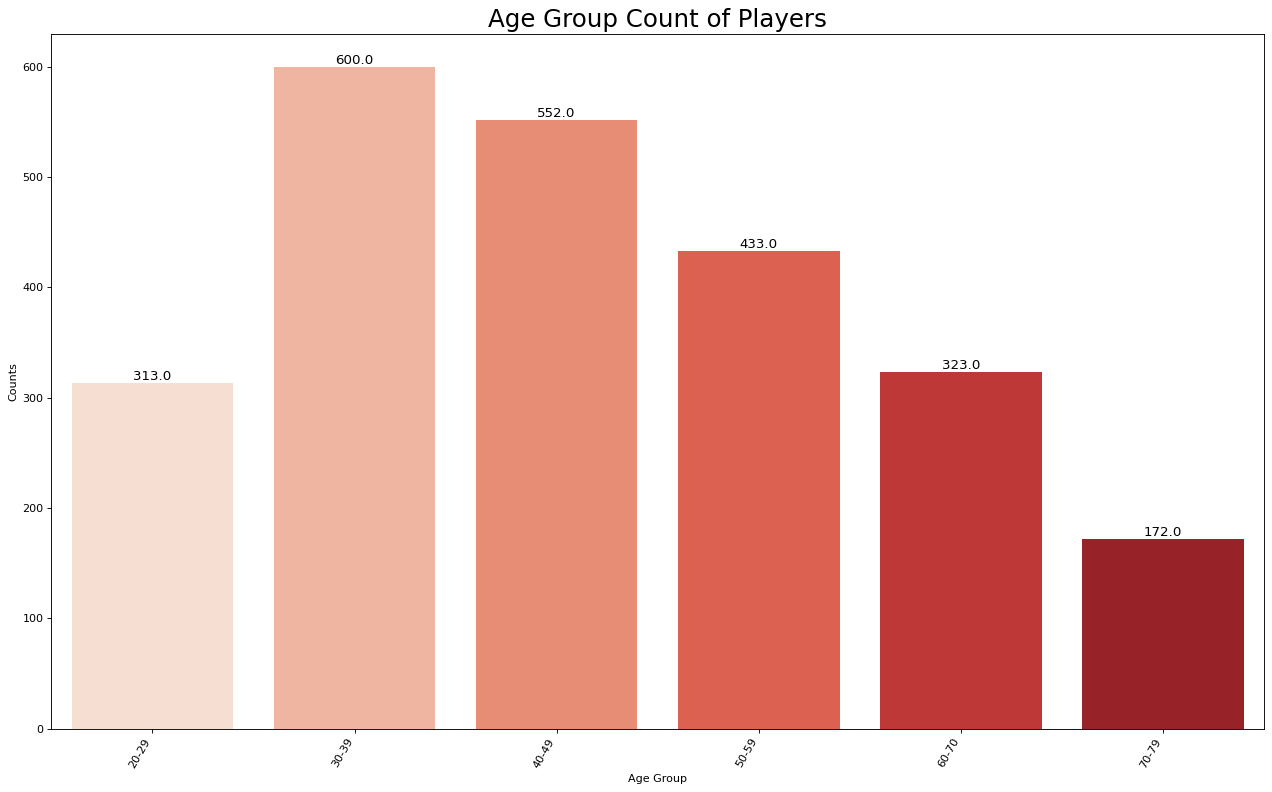

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Prepare Data
df = users_age_df_grouped.toPandas()

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
sns.barplot(x="age_group", y="age_group_count", data=df, palette="Reds")

# Add counts above the bars
for i, val in enumerate(df['age_group_count'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Customize the chart
plt.gca().set_xticklabels(df['age_group'], rotation=60, horizontalalignment='right')
plt.title('Age Group Count of Players', fontsize=22)
plt.ylabel('Counts')
plt.xlabel('Age Group')
plt.tight_layout()

# Show the chart
plt.show()


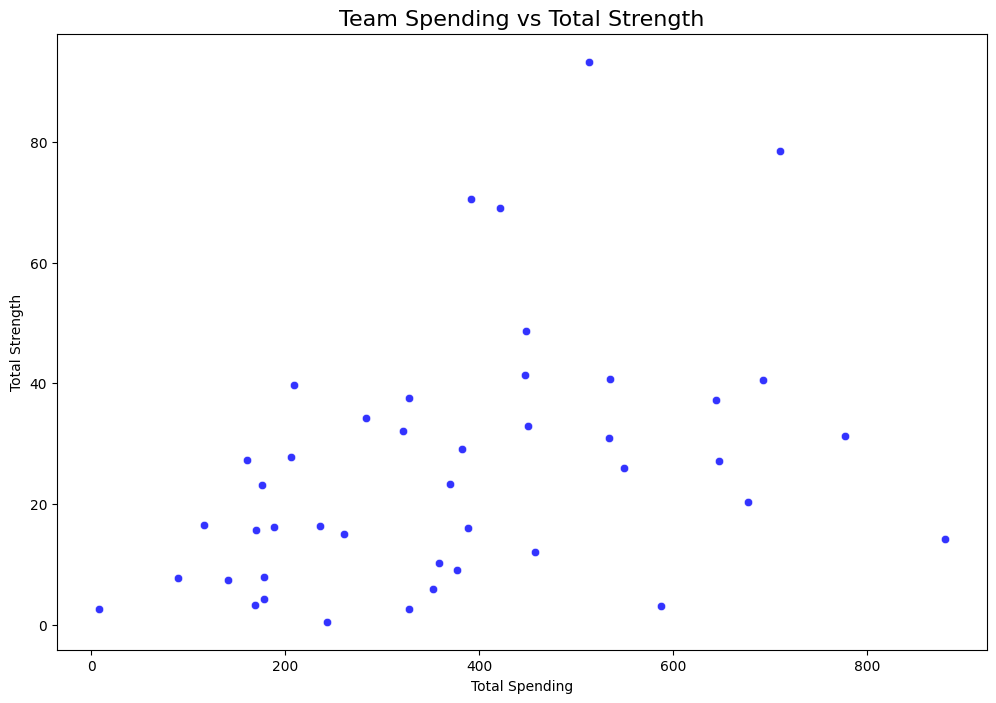

0.3967449588436291

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare Data
df = team_buying_df_group.toPandas()

# Create Scatter Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="total_spending", y="total_strength", data=df, alpha=0.8, color="blue", legend = 'full')

# Customize the Chart
plt.title("Team Spending vs Total Strength", fontsize=16)
plt.xlabel("Total Spending")
plt.ylabel("Total Strength")

# Show the Chart
plt.show()

team_buying_df_group.stat.corr("total_spending","total_strength")


#Product with maximum buy counts

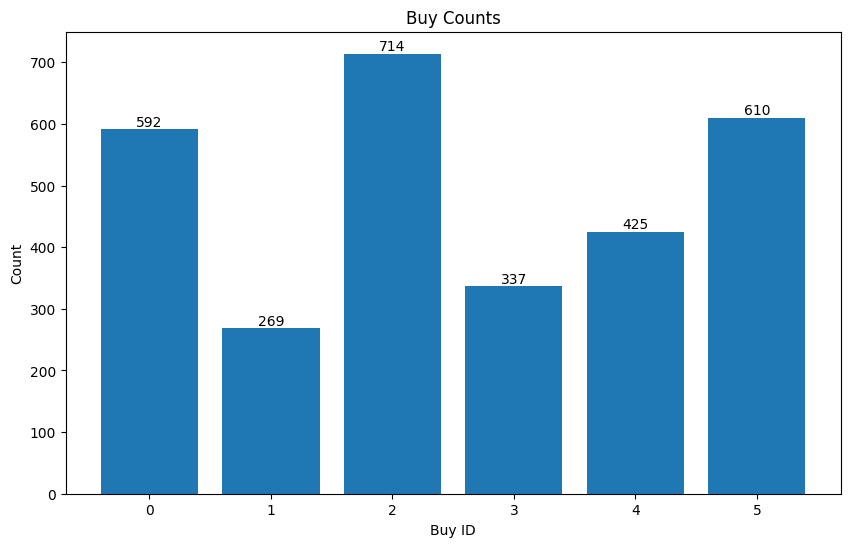

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import count, asc


# Group the DataFrame by the buyId column and count the number of occurrences
buy_counts = buy_clicks_df.groupBy('buyId').agg(count('buyId').alias('count')).orderBy(asc('buyId'))



# Convert the resulting DataFrame to Pandas and plot a bar chart
buy_counts_pd = buy_counts.toPandas()


plt.figure(figsize=(10, 6))

# Plot the bar chart
plt.bar(buy_counts_pd['buyId'], buy_counts_pd['count'])
plt.title('Buy Counts')
plt.xlabel('Buy ID')
plt.ylabel('Count')

# Add counts above the bars
for i, val in enumerate(buy_counts_pd['count'].values):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})

plt.show()




#Gross Revenue generated by each item

   buyId  count  total_price  revenue
0      0    592        592.0    592.0
1      1    269        538.0    538.0
2      2    714       2142.0   2142.0
3      3    337       1685.0   1685.0
4      4    425       4250.0   4250.0
5      5    610      12200.0  12200.0


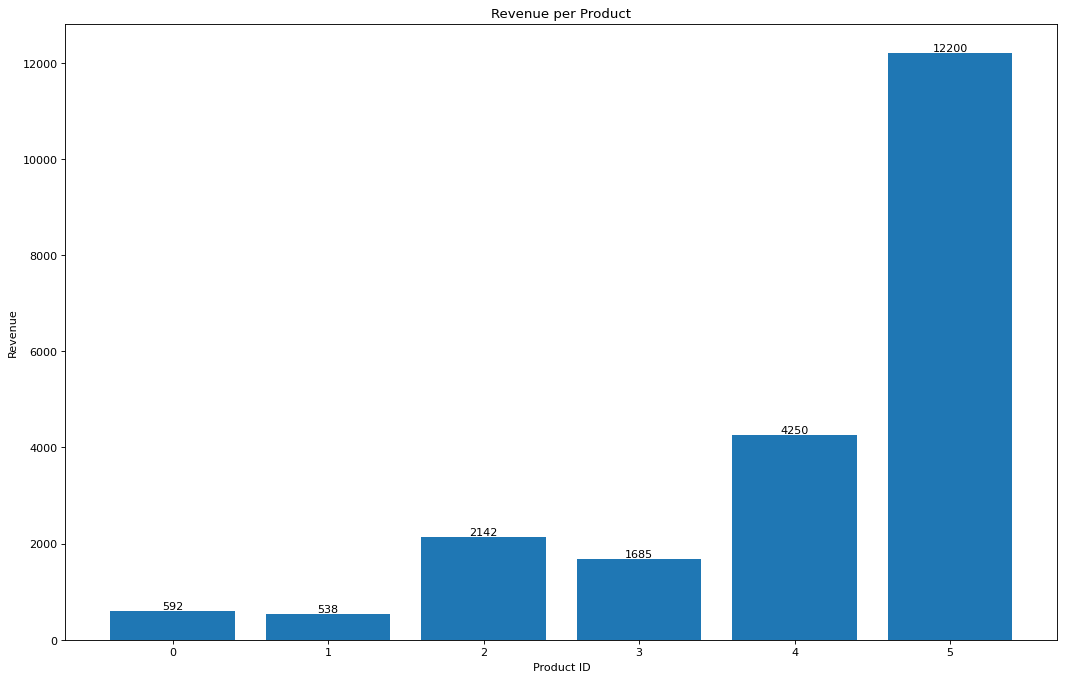

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import count, sum, asc
import mplcursors

# Group the DataFrame by the productId column and count the number of occurrences
product_counts = buy_clicks_df.groupBy('buyId').agg(count('buyId').alias('count'), sum('price').alias('total_price'))

# Calculate the revenue for each product
product_counts = product_counts.withColumn('revenue', product_counts['total_price']).orderBy(asc('buyId'))

# Convert the resulting DataFrame to Pandas and plot a bar chart of the revenue for each product
product_counts_pd = product_counts.toPandas()

print(product_counts_pd)

# Create the bar chart
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
bars = ax.bar(product_counts_pd['buyId'], product_counts_pd['revenue'])
ax.set_title('Revenue per Product')
ax.set_xlabel('Product ID')
ax.set_ylabel('Revenue')

# Add counts above the bars
for i, val in enumerate(product_counts_pd['revenue'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})

# Show the plot
plt.show()

#Amount spent by top 10 users

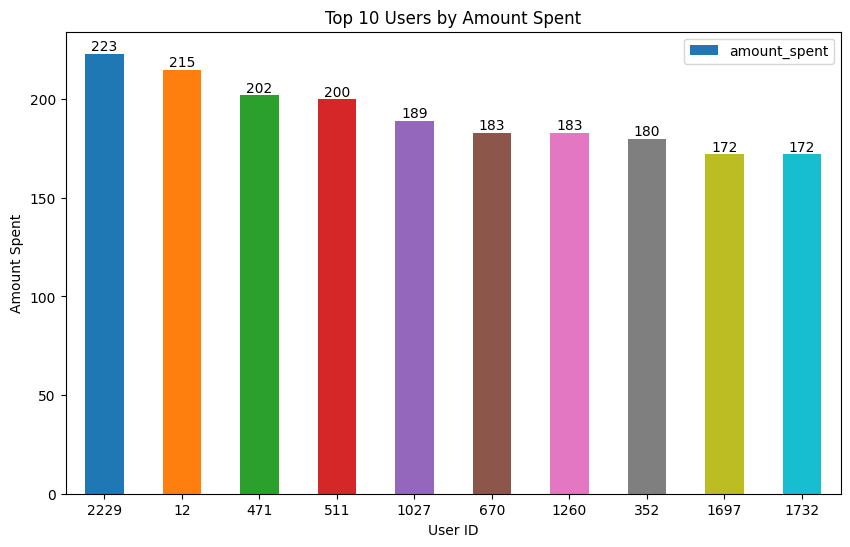

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import sum, desc

# Group the DataFrame by the userId column and sum the price column to get the total amount spent by each user
user_amounts = buy_clicks_df.groupBy('userId').agg(sum('price').alias('amount_spent'))

# Sort the resulting DataFrame by amount_spent in descending order and select the top 10 users
top_users = user_amounts.orderBy(desc('amount_spent')).limit(10)

# Convert the resulting DataFrame to Pandas and plot a horizontal bar chart of the amount spent by each user
top_users_pd = top_users.toPandas()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
ax = top_users_pd.plot(kind='bar', x='userId', y='amount_spent', figsize=(10,6), color=colors)
ax.set_title('Top 10 Users by Amount Spent')
ax.set_xlabel('User ID')
ax.set_ylabel('Amount Spent')
ax.set_xticklabels(top_users_pd['userId'], rotation=0)

# Add counts above the bars
for i, val in enumerate(top_users_pd['amount_spent'].values):
    plt.text(i, val, int(val),  horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':10})

plt.show()


#Continents with most no of users

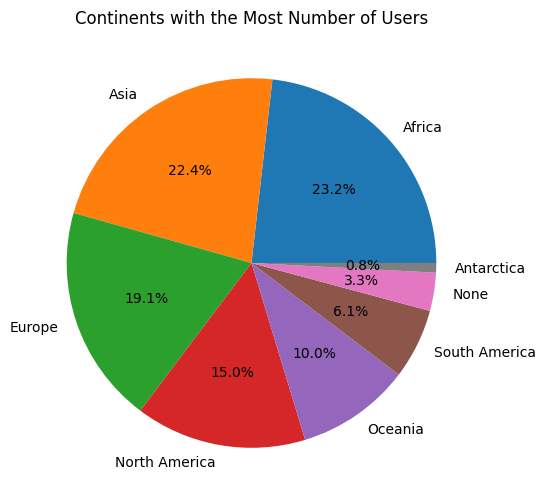

In [ ]:
import pycountry_convert as pc
from pyspark.sql.types import StringType
from pyspark.sql.functions import udf
from pyspark.sql import functions as f 
import matplotlib.pyplot as plt

def get_continent(country_name):
    try:
        country_continent_code = pc.country_alpha2_to_continent_code(country_name)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return "None"

# Create a UDF to map country names to continent names
country_to_continent = f.udf(get_continent, StringType())

# Add a new column to the DataFrame with the continent names
users_new_df = users_df.withColumn("continent", country_to_continent(f.col("country")))

# Group the DataFrame by the continent column and count the number of users in each continent
continent_counts = users_new_df.groupBy('continent').count().orderBy('count', ascending=False)

# Get the top 5 continents with the most number of users
top_continents = continent_counts.toPandas()

# Plot a pie chart of the top 5 continents with the count of users
plt.figure(figsize=(10, 6))
plt.pie(top_continents['count'], labels=top_continents['continent'], autopct='%1.1f%%')
plt.title("Continents with the Most Number of Users")
plt.show()


#Popular Ad category

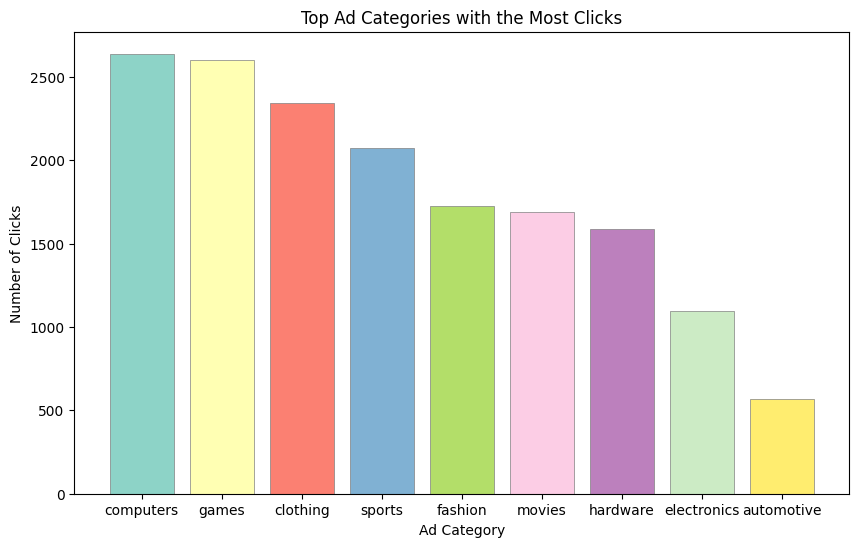

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the color map
cmap = plt.get_cmap('Set3')

# Group the DataFrame by the adCategory column and count it to get the total no of clicks
ad_clicks_df_new = ad_clicks_df.groupBy('adCategory').agg(count('adCategory').alias('total_ad_click'))

# Sort the resulting DataFrame by amount_spent in descending order and select the top 10 users
top_ads = ad_clicks_df_new.orderBy(desc('total_ad_click'))

top_ads_pd = top_ads.toPandas()

# Create a list of colors based on the color map
colors = [cmap(i) for i in np.linspace(0, 1, len(top_ads_pd))]

plt.figure(figsize=(10, 6))
bars = plt.bar(top_ads_pd['adCategory'], top_ads_pd['total_ad_click'], color=colors)
for bar in bars:
    bar.set_edgecolor('grey')
    bar.set_linewidth(0.5)
plt.title("Top Ad Categories with the Most Clicks")
plt.xlabel("Ad Category")
plt.ylabel("Number of Clicks")
plt.show()

#User Spending VS user hit ratio

+------+------------+
|userId|amount_spent|
+------+------------+
|   471|       202.0|
|  1645|        16.0|
|  2142|        22.0|
|  2122|         8.0|
|   243|        14.0|
+------+------------+
only showing top 5 rows

+------+--------------------+
|userId|hit_ratio_percentage|
+------+--------------------+
|   471|                14.5|
|  1591|               10.97|
|  1645|                9.93|
|  2142|               12.51|
|  1342|               10.15|
+------+--------------------+
only showing top 5 rows

+------+------------+------+--------------------+
|userId|amount_spent|userId|hit_ratio_percentage|
+------+------------+------+--------------------+
|   471|       202.0|   471|                14.5|
|  1645|        16.0|  1645|                9.93|
|  2142|        22.0|  2142|               12.51|
|  2122|         8.0|  2122|                9.83|
|   243|        14.0|   243|                9.29|
+------+------------+------+--------------------+
only showing top 5 rows



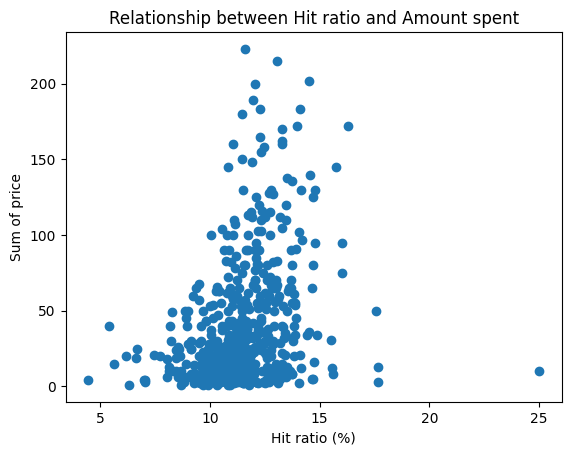

Correlation between Amount spent and Hit ratio (%) is: 0.3242673106289503


In [ ]:
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
import pandas as pd

sum_price_df = buy_clicks_df.groupBy("userId").agg(sum('price').alias('amount_spent'))
sum_price_df.show(5)

# Calculate the Hit ratio for each user
hit_ratio_df = game_clicks_df.groupBy("userId")\
    .agg(f.round((f.avg(f.when(f.col("isHit") == True, 1).otherwise(0))) * 100, 2).alias("hit_ratio_percentage"))
hit_ratio_df.show(5)

# Join the two DataFrames on the userId column
joined_df = sum_price_df.alias("pricedf").join(hit_ratio_df.alias("hitdf"), f.col("pricedf.userId") == f.col("hitdf.userId"), "inner")
joined_df.show(5)

final_pd = joined_df.toPandas()
plt.scatter(final_pd["hit_ratio_percentage"], final_pd["amount_spent"])
plt.xlabel("Hit ratio (%)")
plt.ylabel("Sum of price")
plt.title("Relationship between Hit ratio and Amount spent")
plt.show()

correlation = joined_df.stat.corr("amount_spent", "hit_ratio_percentage")
print("Correlation between Amount spent and Hit ratio (%) is:", correlation)


#Time series - Ad clicks

To see at what time of the day ad-clicks are more

+----+-----+
|hour|count|
+----+-----+
|   0|  605|
|   1|  728|
|   2|  633|
|   3|  552|
|   4|  614|
+----+-----+
only showing top 5 rows



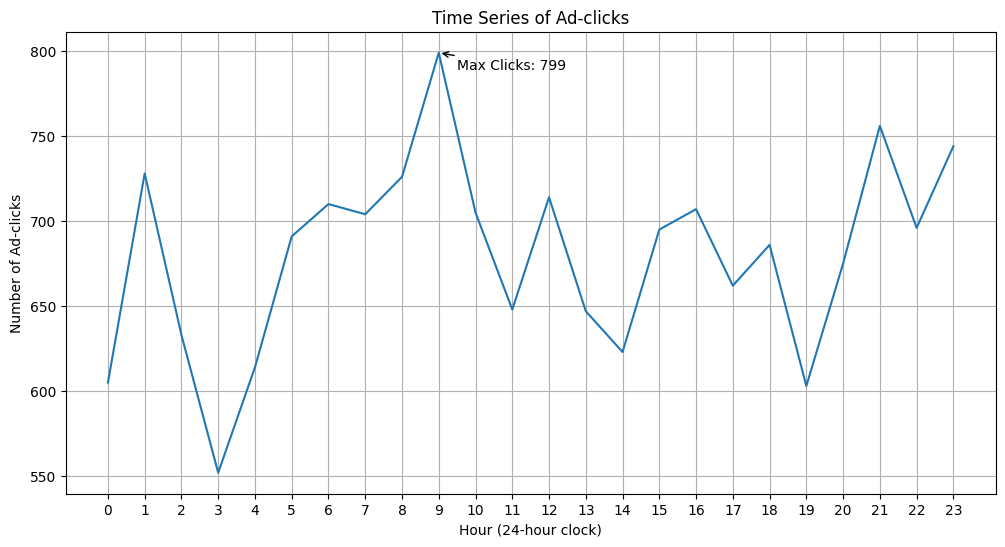

In [ ]:
import pyspark.sql.functions as f
import matplotlib.pyplot as plt



# Convert the timestamp column to a proper timestamp type
ad_clicks_df = ad_clicks_df.withColumn("timestamp", f.to_timestamp("timestamp"))

# Extract the hour from the timestamp
ad_clicks_df = ad_clicks_df.withColumn("hour", f.hour("timestamp"))

# Group the data by the hour and count the number of ad-clicks
ad_clicks_count_df = ad_clicks_df.groupBy("hour").count().orderBy("hour")


# Convert the resulting DataFrame to Pandas for plotting
ad_clicks_pd = ad_clicks_count_df.toPandas()



# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(ad_clicks_pd["hour"], ad_clicks_pd["count"])
plt.xlabel("Hour (24-hour clock)")
plt.ylabel("Number of Ad-clicks")
plt.title("Time Series of Ad-clicks")
plt.xticks(range(24))
plt.grid(True)

# Highlight the hour with the maximum ad-clicks
max_clicks_hour = ad_clicks_pd.loc[ad_clicks_pd["count"].idxmax(), "hour"]
max_clicks_count = ad_clicks_pd["count"].max()
plt.annotate(f"Max Clicks: {max_clicks_count}", xy=(max_clicks_hour, max_clicks_count),
             xytext=(max_clicks_hour + 0.5, max_clicks_count - 10 ),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()


#Relation between age and Ad Category
To provide focused ads

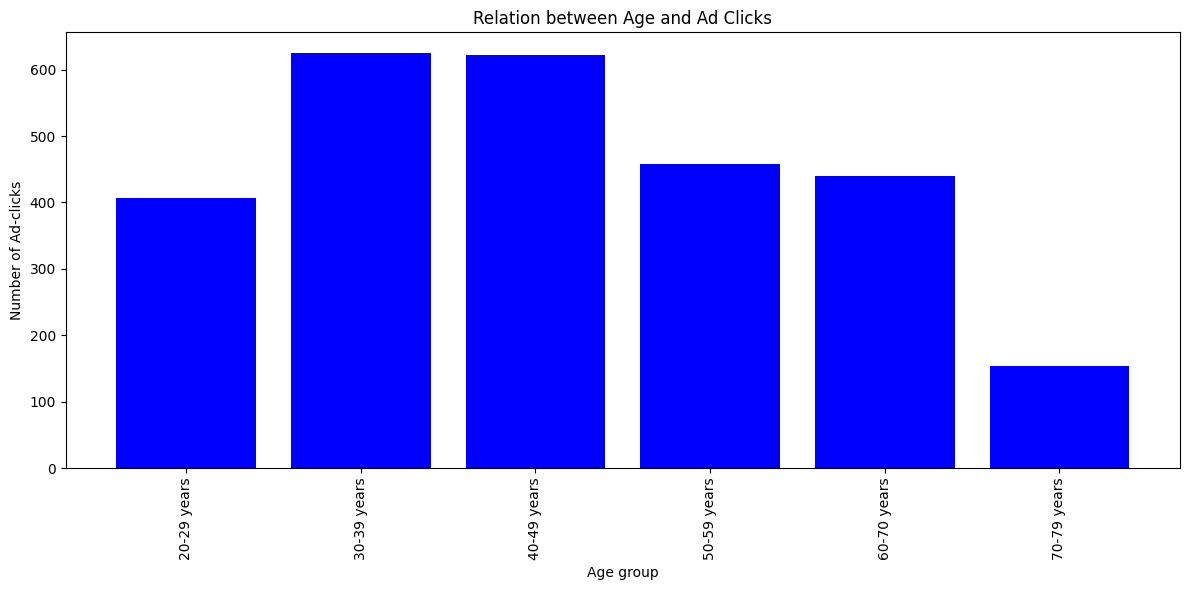

In [ ]:
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql.functions import asc



# Join the DataFrames on the userId column
joined_df = ad_clicks_df.join(users_age_df, 'userId')

# Group the data by age and adCategory and count the number of occurrences
age_category_count_df = joined_df.groupBy('age_group', 'adCategory').count().orderBy(asc('age_group'))

# Convert the resulting DataFrame to Pandas for plotting
age_category_pd = age_category_count_df.toPandas()

# Plot a bar chart to visualize the relationship between age and adClicks
plt.figure(figsize=(12, 6))
plt.bar(age_category_pd['age_group'].astype(str) + " years", age_category_pd["count"], color="blue")
plt.xlabel("Age group")
plt.ylabel("Number of Ad-clicks")
plt.title("Relation between Age and Ad Clicks")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


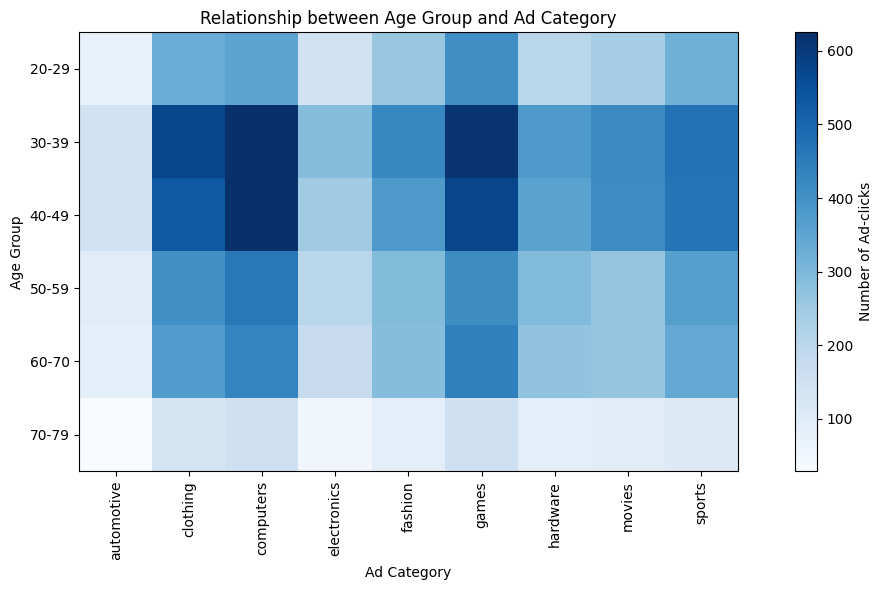

In [ ]:
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
import pandas as pd

# Join the DataFrames on the userId column
joined_df = ad_clicks_df.join(users_age_df, 'userId')

# Group the data by age_group and adCategory and count the number of occurrences
age_category_count_df = joined_df.groupBy('age_group', 'adCategory').count()

# Convert the resulting DataFrame to Pandas for plotting
age_category_pd = age_category_count_df.toPandas()

# Pivot the DataFrame to create a matrix of age groups and ad categories
pivot_df = age_category_pd.pivot(index='age_group', columns='adCategory', values='count')

# Plot a heatmap to visualize the relationship between age groups and ad categories
plt.figure(figsize=(12, 6))
plt.imshow(pivot_df.values, cmap='Blues')
plt.xticks(range(len(pivot_df.columns)), pivot_df.columns, rotation=90)
plt.yticks(range(len(pivot_df.index)), pivot_df.index)
plt.colorbar(label='Number of Ad-clicks')
plt.xlabel('Ad Category')
plt.ylabel('Age Group')
plt.title('Relationship between Age Group and Ad Category')
plt.tight_layout()
plt.show()


#Popular platform

  platformType  count
0       iphone    450
1      android    398
2        linux     55
3          mac     52
4      windows    152


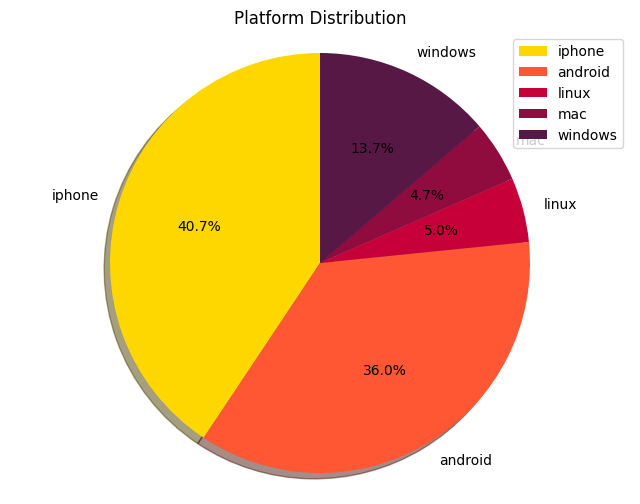

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import count

# Finding distinct users
distinct_users_platforms = user_session_df.select('userId', 'platformType').distinct()

# Group the data by platformType and count the number of occurrences
platform_stats = distinct_users_platforms.groupby('platformType').agg(count('platformType').alias('count'))

# Convert the resulting DataFrame to Pandas for analysis and visualization
platform_stats_pd = platform_stats.toPandas()


print(platform_stats_pd)

# Define custom colors for the pie slices
colors = ['#FFD700', '#FF5733', '#C70039', '#900C3F', '#581845']

# Plotting a pie chart
plt.figure(figsize=(8, 6))
plt.pie(platform_stats_pd['count'], labels=platform_stats_pd['platformType'], colors=colors,
        autopct='%1.1f%%', startangle=90, shadow=True)

plt.title('Platform Distribution')

# Add a legend with custom colors
plt.legend(labels=platform_stats_pd['platformType'], loc='best')

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

plt.show()


#k-means CLUSTERING

In [60]:
from pyspark.ml.feature import StringIndexer
import pyspark.sql.functions as f
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col,when
# Load the combined_data.csv file into a DataFrame
combined_data_df = spark.read.csv("/content/combined-data.csv", header=True)

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

# Indexing
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_indexed')
# Indexer identifies categories in the data
indexer_model = indexer.fit(combined_data_df)
# Indexer creates a new column with numeric index values
indexed_df = indexer_model.transform(combined_data_df)
#indexed_df.show()

indexed_df = indexed_df.withColumn("avg_price", when(col("avg_price") == "NULL", 0).otherwise(col("avg_price")))

indexed_df = indexed_df\
                          .withColumn('total',sum(f.col('avg_price')).over(window))\
                          .withColumn("Spender_NonSpender", f.when(f.col("avg_price") > 5,1).otherwise(0))

# Group by userId and calculate total_gameclicks and total_hits
grouped_df = indexed_df.groupby("userId") \
    .agg(f.sum("count_gameclicks").alias('total_gameclicks'),
         f.sum("count_hits").alias("total_hits"),
         f.sum("avg_price").alias("avg_price_total"))\
    .withColumn('Percent', f.col('total_hits') * 100 / f.col('total_gameclicks')) \
    .withColumn("Hitter_NonHitter", f.when(f.col("Percent") > 10, 1).otherwise(0))

# Join indexed_df and grouped_df on userId
cluster_df = indexed_df.join(grouped_df, "userId", "inner")

# Show the joined DataFrame
cluster_df.show()


+------+-------------+---------+------------+----------------+----------+-----------+---------+--------------------+------------------+------------------+----------------+----------+---------------+------------------+----------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|platformType_indexed|             total|Spender_NonSpender|total_gameclicks|total_hits|avg_price_total|           Percent|Hitter_NonHitter|
+------+-------------+---------+------------+----------------+----------+-----------+---------+--------------------+------------------+------------------+----------------+----------+---------------+------------------+----------------+
|   812|         5648|        1|     android|              69|         8|       NULL|        0|                 1.0|10179.410000000002|                 0|             669|        74|            0.0|11.061285500747385|               1|
|  1658|         5649|        1|      iphone|              3

#Assembling, Scaling and building Pipeline

In [61]:

from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
featuresUsed = [
 'teamLevel',
"avg_price_total",
"total_hits",
"platformType_indexed",
"Hitter_NonHitter",
"Spender_NonSpender",
 ]

assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(cluster_df)

#assembled.show()

scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaled_df = scaler.fit(assembled).transform(assembled)

# Create a KMeans instance
kmeans = KMeans(featuresCol='scaled_features')

# assemble the pipeline 
pipe = Pipeline(stages=[assembler, scaler, kmeans])



#Elbow method

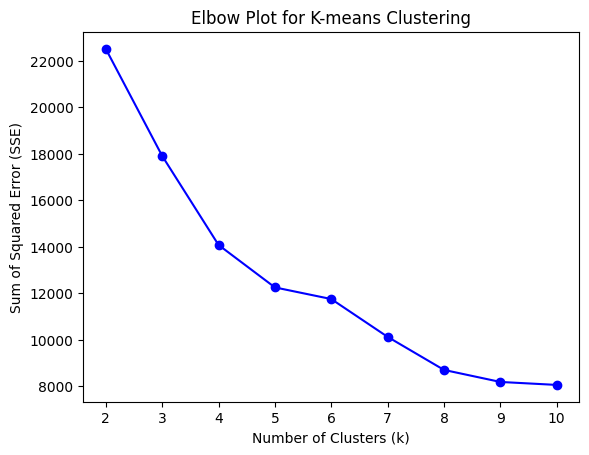

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of k values
k_values = range(2, 11)  # Choose the range according to your preference

# Initialize an empty list to store the SSE (Sum of Squared Errors) for each k value
sse_values = []

# Iterate over each k value
for k in k_values:
    # Set the k value for the KMeans instance in the pipeline
    kmeans.setK(k)

    # Fit the pipeline on the data
    model = pipe.fit(cluster_df)

    # Get the SSE for the fitted model
    sse = model.stages[-1].summary.trainingCost
    sse_values.append(sse)

# Plot the elbow curve
plt.plot(k_values, sse_values, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Plot for K-means Clustering')
plt.show()


In [63]:
pipe.getStages()[-1].setK(5).setSeed(1)  # set the random seed for the algorithm and the value for k

# fit model and transform the data
model = pipe.fit(cluster_df)
clusters = model.transform(cluster_df)
clusters.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+--------------------+------------------+------------------+----------------+----------+---------------+------------------+----------------+--------------------+--------------------+----------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|platformType_indexed|             total|Spender_NonSpender|total_gameclicks|total_hits|avg_price_total|           Percent|Hitter_NonHitter|            features|     scaled_features|prediction|
+------+-------------+---------+------------+----------------+----------+-----------+---------+--------------------+------------------+------------------+----------------+----------+---------------+------------------+----------------+--------------------+--------------------+----------+
|   812|         5648|        1|     android|              69|         8|       NULL|        0|                 1.0|10179.410000000002| 

In [29]:
# Print cluster centers
kmeans_model = model.stages[-1]
cluster_centers = kmeans_model.clusterCenters()
for i, center in enumerate(cluster_centers):
    print(f"Cluster {i}: {center}")


Cluster 0: [2.38476923 0.15691234 0.87172013 0.79291511 0.         0.0094793 ]
Cluster 1: [2.00107452 0.20607769 1.41138082 2.72936447 2.02577141 0.06155185]
Cluster 2: [2.58654246 2.31532851 1.3329062  0.14771617 2.17499397 3.03089805]
Cluster 3: [2.97154388 0.31370612 0.97671333 0.70199483 2.3452479  0.        ]
Cluster 4: [1.30911668 0.74514324 1.83161472 0.50357327 2.33061623 0.        ]


In [ ]:
import plotly.express as px

df = clusters_output.toPandas()

# Define a custom color palette for the clusters
color_palette = px.colors.qualitative.Dark24[:len(df['prediction'].unique())]

fig = px.scatter_3d(df, x='avg_price_total', y='total_hits', z='teamLevel', color='prediction',
                    color_discrete_sequence=color_palette, template='ggplot2')
fig.show()


#Hierarchical Clustering

In [47]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator

assembled_data = assembler.transform(cluster_df) 

silhouette_scores=[]
evaluator = ClusteringEvaluator(featuresCol='features', \
metricName='silhouette')
for K in range(2,11):

    BKMeans_=BisectingKMeans(featuresCol='features', k=K, minDivisibleClusterSize =1)

    BKMeans_fit=BKMeans_.fit(assembled_data)

    BKMeans_transform=BKMeans_fit.transform(assembled_data) 

    evaluation_score=evaluator.evaluate(BKMeans_transform)

    silhouette_scores.append(evaluation_score)

Plot the silhouette scores against the number of clusters.

Text(0, 0.5, 'Silhouette Score')

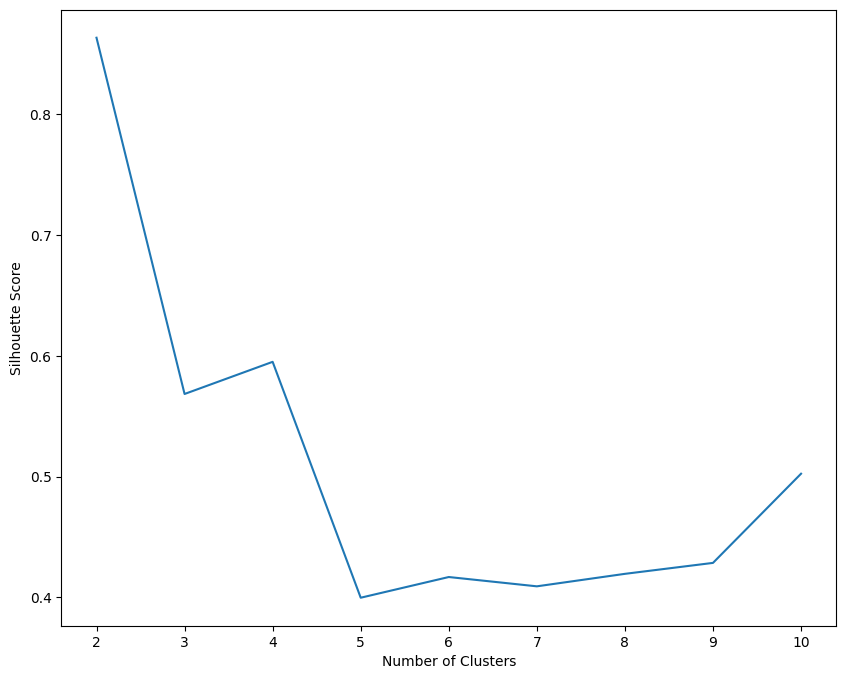

In [48]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

## Building Hierarchical model 

In [49]:
BKMeans_=BisectingKMeans(featuresCol='features', k=4) 
BKMeans_Model=BKMeans_.fit(assembled_data)
BKMeans_transform=BKMeans_Model.transform(assembled_data)

## Visualize Hierarchical Clustering using the PCA

To visualize the 4-dimensional data into 2, we will use a dimensionality reduction technique viz. PCA. Spark has its own flavour of PCA.

In [50]:
#perform the PCA
from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(assembled_data)
pca_transformed = pca_model.transform(assembled_data)

In [51]:
#extract the principal components
import numpy as np
X_pca = pca_transformed.rdd.map(lambda row: row.pca).collect()
X_pca = np.array(X_pca)

In [52]:
#retrieve the cluster assignments from bisecting k-means assignments
cluster_assignment = np.array(BKMeans_transform.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)
cluster_assignment

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

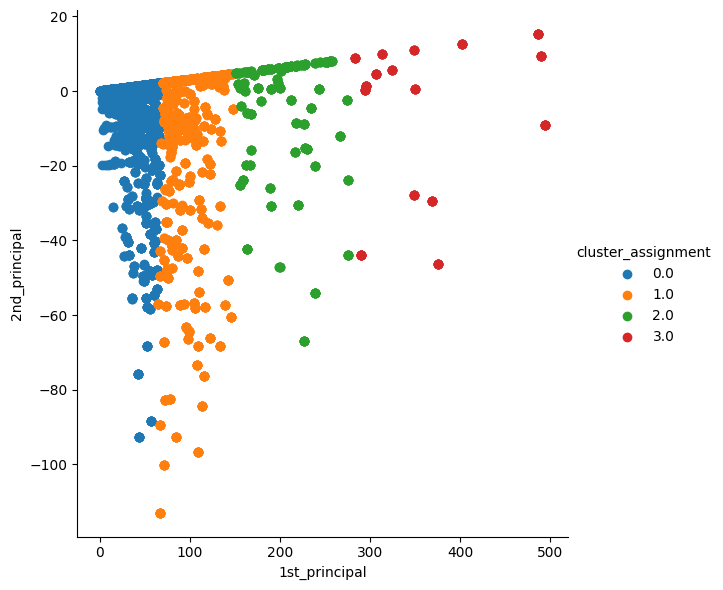

In [54]:
#plot the principal components

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pca_data = np.hstack((X_pca,cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()
plt.show()